In [1]:
import numpy as np
import scipy.spatial as spatial
import shapes
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import open3d as o3d

%load_ext autoreload
%autoreload 2


In [2]:
def supercoords(params, shape=(50,50)):
    '''Returns coordinates of a parametrized 3D supershape.
    
    See
    http://paulbourke.net/geometry/supershape/
    https://en.wikipedia.org/wiki/Superformula
    Params
    ------
    params: 1x6 or 2x6 array
        Parameters of the two supershapes. If 1x6 the same
        parameters will be used for the second supershape.
        The order of the parameters is as follows:
        m: float
            long/lat frequency.
            Defaults to 0.01
        a: float
            long/lat inverse amplitude of first term.
            Defaults to 1.
        b: float
            long/lat inverse amplitude of second term
            Defaults to 1.
        n1: float
            First exponent. Defaults to 0.1
        n2: float
            Second exponent. Defaults to 0.01
        n3: float
            Third exponent. Actually (-1/n3). Defaults to 10.0
    shape : tuple
        longitude/latitude resolution (U,V)
    Returns
    -------
    x: UxV array
        x coordinates for each long/lat point
    y: UxV array
        y coordinates for each long/lat point
    z: UxV array
        z coordinates for each long/lat point
    '''
    
    params = np.atleast_2d(params)
    if params.shape[0] == 1:
        params = np.tile(params, (2,1))

    sf = lambda alpha, sp: (
        np.abs(np.cos(sp[0]*alpha/4.)/sp[1])**sp[4] + 
        np.abs(np.sin(sp[0]*alpha/4.)/sp[2])**sp[5]
    )**(-1/sp[3])

    u = np.linspace(-np.pi, np.pi, shape[0]) # long., theta
    v = np.linspace(-np.pi/2, np.pi/2, shape[1]) # lat., phi
        
    g = np.meshgrid(v, u)
    uv = np.stack((g[1],g[0]),-1)
    r1 = sf(uv[...,0], params[0])
    r2 = sf(uv[...,1], params[1])    

    x = r1 * np.cos(u)[:,None] * r2 * np.cos(v)[None, :]
    y = r1 * np.sin(u)[:,None] * r2 * np.cos(v)[None, :]
    z = r2 * np.sin(v)[None, :]

    return x,y,z

In [3]:
x,y,z = supercoords([0.1, 1, 1, 0.1, 1, .1])

In [4]:
import scipy

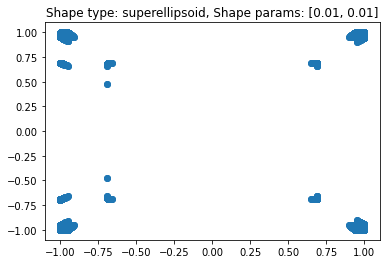

In [29]:
shape_type = "superellipsoid"
shape_params = [.01, .01]
s = shapes.SuperQuadric(shape_type, shape_params, [1, 1, 1, 2], n_points=500)
x, y, z = s.points

plt.scatter(x, y)
plt.title(f"Shape type: {shape_type}, Shape params: {shape_params}")
plt.show()

In [34]:
import pyvista as pv

points = np.stack([x, y, z], axis=1)
print(points.shape)
cloud = pv.PolyData(points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
shell.plot()


(250000, 3)


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

2022-10-26 19:14:46.639 (  64.483s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.639 (  64.483s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.640 (  64.484s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.655 (  64.499s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.656 (  64.500s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.656 (  64.500s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.671 (  64.515s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.671 (  64.515s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:46.672 (  64.51

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

2022-10-26 19:14:47.302 (  65.146s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.303 (  65.147s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.303 (  65.147s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.316 (  65.160s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.316 (  65.160s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.316 (  65.160s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.317 (  65.161s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.330 (  65.174s) [          9B6038]            vtkMath.cxx:590   WARN| Unable to factor linear system
2022-10-26 19:14:47.330 (  65.17

In [11]:
s = shapes.SuperQuadric("superellipsoid", [2, 2], [1, 1, 1, 3], n_points=50)
points = s.compute_points()
print(points)
faces = s.compute_faces()
fig = go.Figure(data=[go.Scatter3d(x=points[0], y=points[1], z=points[2], opacity=0.50)])
fig.show()



(array([-0.02391653, -0.02352543, -0.02237772, ..., -0.02237772,
       -0.02352543, -0.02391653]), array([-3.58690429e-34, -3.91096620e-04, -1.53880474e-03, ...,
        1.53880474e-03,  3.91096620e-04,  3.58690429e-34]), array([-1., -1., -1., ...,  1.,  1.,  1.]))


In [12]:
def cos_exp(x, exp):
    return np.sign(np.cos(x)) * np.abs(np.cos(x)) ** exp

def sin_exp(x, exp):
    return np.sign(np.sin(x)) * np.abs(np.sin(x))** exp

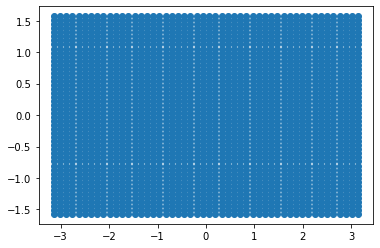

In [13]:
v = np.linspace(-np.pi / 2, np.pi / 2, 50)
u = np.linspace(-np.pi, np.pi, 50)
w = .01

u, v = np.meshgrid(u,v, indexing="ij")
u = u.flatten()
v = v.flatten()

plt.scatter(u, v)

In [15]:
from scipy.spatial import Delaunay
u = np.linspace(0, 50, 50)
v = np.linspace(0, 50, 50)
u, v = np.meshgrid(u, v, indexing="ij")
u = u.flatten()
v = v.flatten()
points2d = np.vstack([u, v]).T
triangulation = Delaunay(points2d)
#triangulation.lift_points(points2d)
faces = triangulation.simplices
print(faces.shape)

(4802, 3)


In [43]:
import matplotlib.pyplot as plt
v = np.linspace(-np.pi / 2, np.pi / 2, 50)
u = np.linspace(-np.pi, np.pi, 50)

s, t = .01, 1.5

u, v = np.meshgrid(u,v, indexing="xy")
u = u.flatten()
v = v.flatten()

x = cos_exp(v, s) * cos_exp(u, t)
y = cos_exp(v, s) * sin_exp(u, t)
z = sin_exp(v, s)

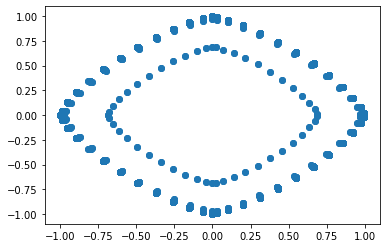

In [44]:
plt.scatter(x, y)

In [45]:
fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=x,
        y=y,
        z=z,
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        # Intensity of each vertex, which will be interpolated and color-coded
        # i, j and k give the vertices of triangles
        i = faces[:, 0],
        j = faces[:, 1],
        k = faces[:, 2],
        name='y',
        showscale=True
    )
])
fig.show()

In [ ]:

fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)
imgs = []
def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])


In [ ]:
from glob import glob
import os
from PIL import Image
import matplotlib.animation as animation
%matplotlib notebook

scene_path = "scenes/multi_texture/scene_000/"
texture_passes = ["noise", "voronoi", "wave", "untextured"]
fig, axs = plt.subplots(1, 4, figsize=(16, 12))

frames_per_image = 64
current_frame = 1
imgs = []

def init():
    for tex in texture_passes:
        img_path = os.path.join(scene_path, tex, f"Image{(current_frame):04d}.png")
        img = np.array(Image.open(img_path))
        plot = axs[i].imshow(img)
        imgs.append(plot)
        
def get_frame():
    frame_imgs = []
    for current_frame in range(2, 65):
        for tex in texture_passes:
            img_path = os.path.join(scene_path, tex, f"Image{(current_frame):04d}.png")
            img = np.array(Image.open(img_path))
            frame_imgs.append(img)

        yield frame_imgs


def run(data):
    # axis limits checking. Same as before, just for both axes
    for i in range(4):
        # update the data of both line objects
        axs[i].imshow(data[i])
    return axs

ani = animation.FuncAnimation(fig, run, get_frame, blit=True, interval=10,
    repeat=False)

writervideo = animation.FFMpegWriter(fps=24)
ani.save("videos/scene_000.mp4", writer=writervideo)
plt.show()
